# ESTANDARIZACIÓN

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import itertools
# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_pickle("datos/bikes_clean_pickle.pkl")
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,holiday,Monday,weekend or holiday,cloudy,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,not holiday,Tuesday,workingday,cloudy,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,not holiday,Wednesday,workingday,clear,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,not holiday,Thursday,workingday,clear,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,not holiday,Friday,workingday,clear,9.305237,43.6957,12.522300,82,1518


In [11]:
mask = np.triu(np.ones_like(df.corr(),dtype = np.bool_))

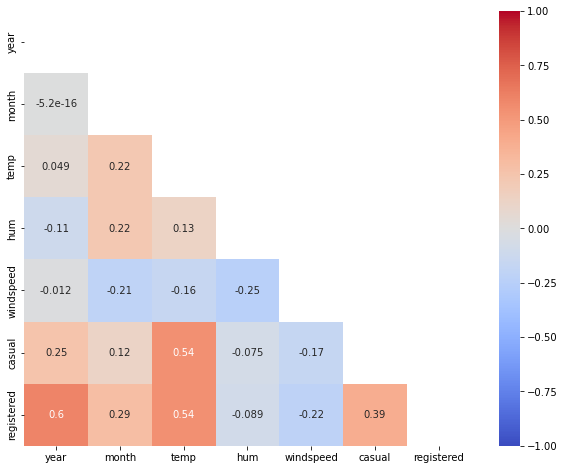

In [12]:
sns.heatmap(df.corr(),
             cmap = 'coolwarm',
             annot = True,
             mask = mask,
             vmin = -1,
             vmax= 1);

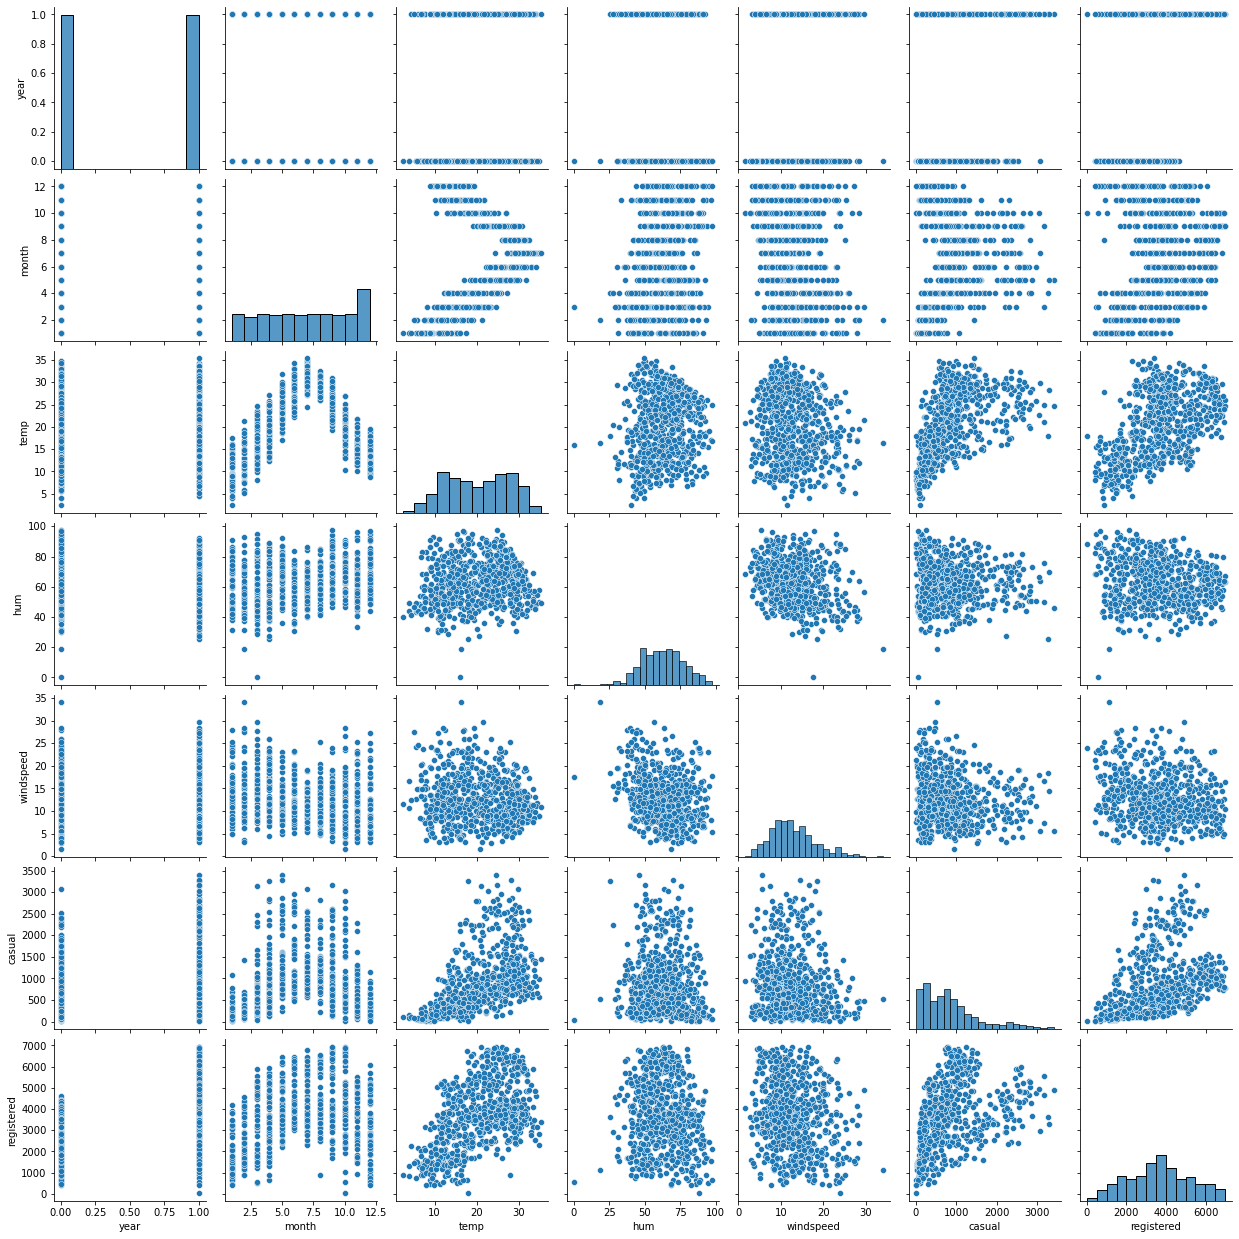

In [13]:
sns.pairplot(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    int64         
 3   month       730 non-null    int64         
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weather     730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 79.8+ KB


In [4]:
numericas = df.select_dtypes(include= np.number)
numericas

,year,month,temp,hum,windspeed,casual,registered
0,0,1,14.110847,80.5833,10.749882,331,654
1,0,1,14.902598,69.6087,16.652113,131,670
2,0,1,8.050924,43.7273,16.636703,120,1229
3,0,1,8.200000,59.0435,10.739832,108,1454
4,0,1,9.305237,43.6957,12.522300,82,1518
...,...,...,...,...,...,...,...
725,1,12,10.420847,65.2917,23.458911,247,1867
726,1,12,10.386653,59.0000,10.416557,644,2451
727,1,12,10.386653,75.2917,8.333661,159,1182
728,1,12,10.489153,48.3333,23.500518,364,1432


In [5]:
numericas.drop(['year', 'month'], axis= 1, inplace=True)

In [7]:
robust = RobustScaler()

In [8]:
robust.fit(numericas)

RobustScaler()

In [9]:
X_robust = robust.transform(numericas)

In [10]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna temp es:  -0.011215113375305362
La desviación estándar de la columna temp es: 0.5744038804193732
-------------------------------------------------------------
La media de la columna hum es:  0.006678312043328607
La desviación estándar de la columna hum es: 0.6783171666603836
-------------------------------------------------------------
La media de la columna windspeed es:  0.09694722724811512
La desviación estándar de la columna windspeed es: 0.7891689924205266
-------------------------------------------------------------
La media de la columna casual es:  0.16949607826785404
La desviación estándar de la columna casual es: 0.8798204095282787
-------------------------------------------------------------
La media de la columna registered es:  -0.0025175211545043832
La desviación estándar de la columna registered es: 0.6838047908783859
-------------------------------------------------------------


In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])